### Problem 2: Diet and Death

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os.path

from scipy.stats import sem, t
from scipy import mean

%matplotlib inline

#### Seaborn settings

In [2]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(11,8)})
sns.set_context("paper", font_scale=1.5)                                                  

#### Import 'cause_of_death.csv ' data set

In [3]:
df1 = pd.read_csv('data/causes_of_death.csv')

### 1. Plotting the death rate for each disease over time (years)

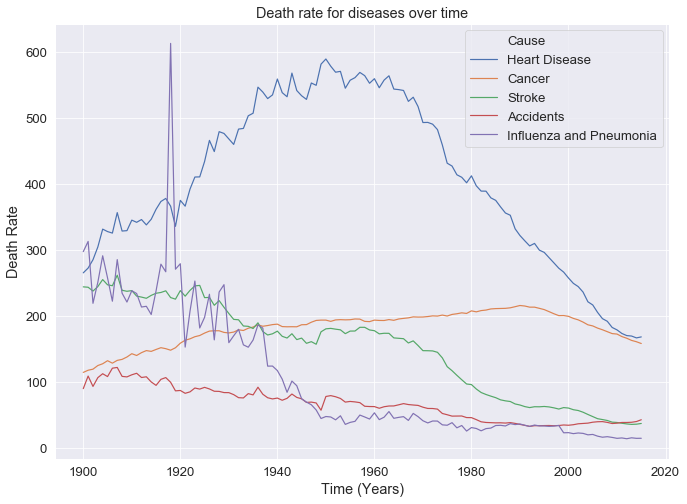

In [4]:
plot = sns.lineplot(x="Year", y="Age Adjusted Death Rate", hue="Cause", data=df1)
plot.set(xlabel='Time (Years)', ylabel='Death Rate')
plot.set_title("Death rate for diseases over time")
plt.show()

#### Import 'framingham.csv' data set

In [5]:
df2 = pd.read_csv('data/framingham.csv')

In [6]:
df2.head(3)

,AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
0,39,106.0,70.0,195.0,0,0,77.0,0,1
1,46,121.0,81.0,250.0,0,0,76.0,0,0
2,48,127.5,80.0,245.0,1,0,70.0,0,0


### 2. Compute the percentage of people who have diabetes


In [7]:
# total number of people
total_people = df2.DIABETES.count()

In [8]:
# number of people who have diabetes (1s) and who don't (0s)
total_diab = df2['DIABETES'].value_counts()

In [9]:
per_diab = (total_diab[1] / total_people) * 100
per_diab

2.732951587714732

So, there are 2.73 % of people who have diabetes.

### 3. histogram of the percent of people in our 200 samples with diabetes

In [10]:
# parameters for multinomial distribution
two_value_probablities = [.97267,.02732]
sample_size= 5000

In [11]:
# Draw 200 samples from a multinomial distribution.
samples = np.random.multinomial(sample_size, two_value_probablities, size=200)

In [12]:
#samples
diabetes_samples = (samples[:,1]/ sample_size) * 100

/Users/pradeepsingh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


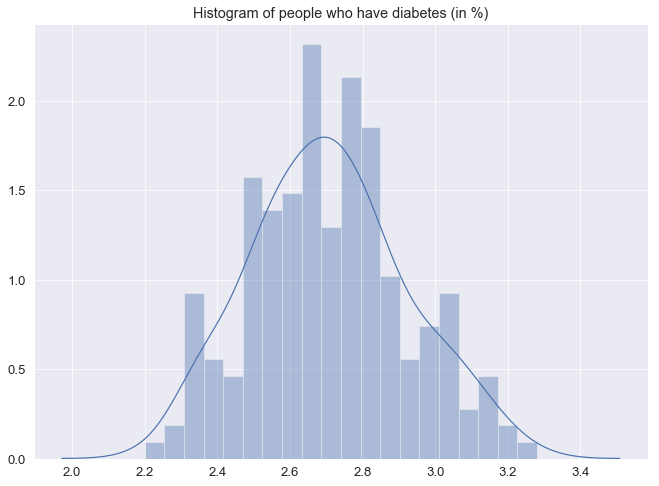

In [13]:
# plot histogram of people who have diabetes in percent

hist = sns.distplot(diabetes_samples,bins=20)
hist.set_title("Histogram of people who have diabetes (in %)")
plt.show()

### 4. Compute the 95% confidence interval of the 200 values

In [14]:
# confidence interval
confidence = 0.95

In [15]:
n = len(diabetes_samples)
m = mean(diabetes_samples)
std_err = sem(diabetes_samples)
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

In [16]:
# confidence interval
start = m - h
end = m + h

In [17]:
print(start) # start pt for CI
print(end)   # end pt for CI
print(m)     # mean

2.6769789401315665
2.7366210598684333
2.7068


 So, the 95% confidence interval is (2.67, 2.74).

### 5. Is the study representative of the general population? Why or why not?

Yes, the study is restudy representative of the general population because the expected mean is in confidence interval.

### 6. Plot the cholesterol values for the people with heart disease and with out heart disease.

In [18]:
df2 = pd.read_csv('data/framingham.csv')

In [19]:
df2.head()

,AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
0,39,106.0,70.0,195.0,0,0,77.0,0,1
1,46,121.0,81.0,250.0,0,0,76.0,0,0
2,48,127.5,80.0,245.0,1,0,70.0,0,0
3,61,150.0,95.0,225.0,1,0,103.0,1,0
4,46,130.0,84.0,285.0,1,0,85.0,0,0


In [20]:
chol_data = df2[['TOTCHOL','ANYCHD']]

In [21]:
chol_data.head()

,TOTCHOL,ANYCHD
0,195.0,1
1,250.0,0
2,245.0,0
3,225.0,0
4,285.0,0


In [22]:
# people with heart disease
heart_dis = chol_data[chol_data.ANYCHD == 1]
# people with no heart disease
no_heart_dis = chol_data[chol_data.ANYCHD == 0]

/Users/pradeepsingh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


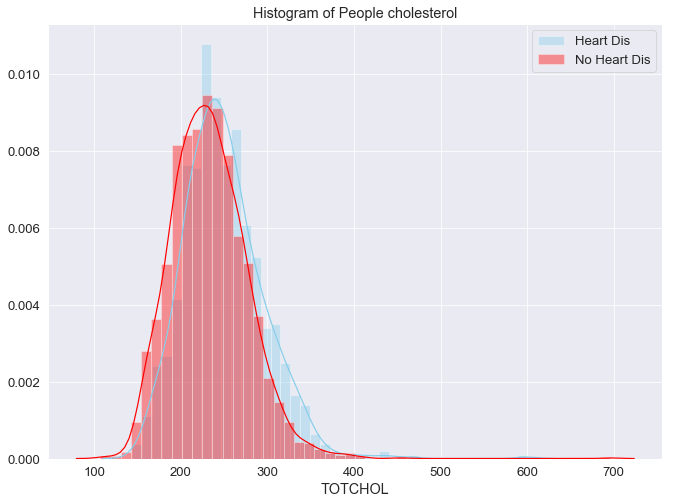

In [23]:
# histogram
hist1= sns.distplot(heart_dis['TOTCHOL'],color="skyblue",label="Heart Dis")
hist2 = sns.distplot(no_heart_dis['TOTCHOL'],color="red",label="No Heart Dis")
plt.legend()
hist1.set_title("Histogram of People cholesterol")
plt.show()

/Users/pradeepsingh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


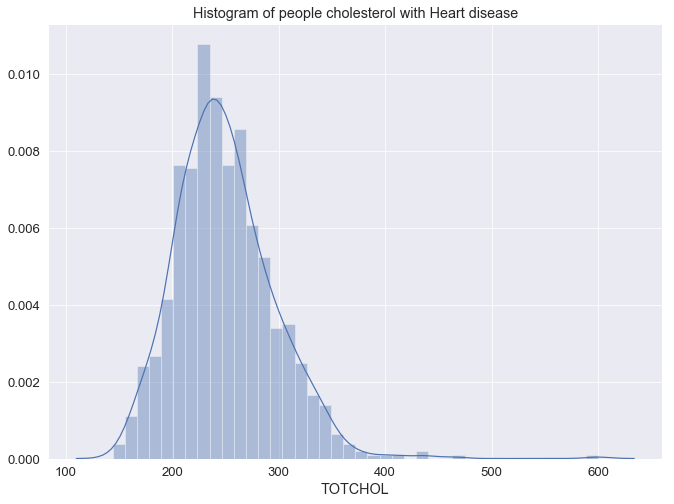

In [24]:
# histogram
hist1 = sns.distplot(heart_dis['TOTCHOL'])
hist1.set_title("Histogram of people cholesterol with Heart disease")
plt.show()

/Users/pradeepsingh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


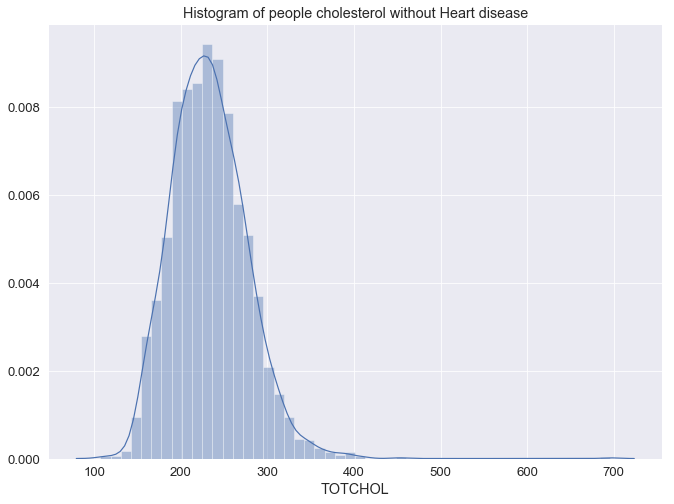

In [25]:
hist2 = sns.distplot(no_heart_dis['TOTCHOL'])
hist2.set_title("Histogram of people cholesterol without Heart disease")
plt.show()

### 7. Compute the 95% confidence interval of the cholesterol values for the people with and with out heart disease.

In [26]:
# CI for people with heart disease

n = len(heart_dis['TOTCHOL'])
m = mean(heart_dis['TOTCHOL'])
std_err = sem(heart_dis['TOTCHOL'])
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

In [27]:
# CI
start_heart_dis = m - h
print(start_heart_dis)

end_heart_dis = m + h
print(end_heart_dis)

246.5403082552965
252.42405233170558


In [28]:
# CI for people with NO heart disease

n = len(no_heart_dis['TOTCHOL'])
m = mean(no_heart_dis['TOTCHOL'])
std_err = sem(no_heart_dis['TOTCHOL'])
h = std_err * t.ppf((1 + confidence) / 2, n - 1)

In [29]:
# CI
start_no_heart_dis = m - h
end_no_heart_dis = m + h

print(start_no_heart_dis)
print(end_no_heart_dis)

231.25983474347473
234.43268603214855


### 8. What can we deduce about cholesterol values and heart disease?

There is 95% chance that people who have cholestral values between (246.5 - 252.4) will have heart disease. And, there is 95% chance that people who have cholestral values between (231.2 - 234.4) will have not have heart disease.